In [59]:
import random
import numpy as np
import copy
import matplotlib.pyplot as plt
from itertools import permutations as per
import itertools
import math
import time

In [9]:
#random coordinates of N points
def initialize_points(N):
    points = []
    for i in range(N):
        x = round(random.random()*100)
        y = round(random.random()*100)
        points.append([x,y])
    return points

In [10]:
#matrix of distances between points
def initialize_map(points):
    N = len(points)
    distance_map = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            distance = math.sqrt((points[i][0]-points[j][0])**2+(points[i][1]-points[j][1])**2)
            distance_map[i][j] = distance
    return distance_map

In [11]:
def connectpoints(x,y,p1,p2):
    x1,x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2])

In [12]:
def total_distance(map_points,order):
    distance = 0
    for i in range(len(order)-1):
        distance += map_points[order[i]][order[i+1]]
    return distance

In [13]:
def distance(a,b):
    x1,y1 = a
    x2,y2 = b
    return math.sqrt((x1-x1)**2+(y2-y1)**2)

In [14]:
def plot_points(map_points,points,order,distance):
    px = [points[i][0] for i in range(len(points))]
    py = [points[i][1] for i in range(len(points))]
    plt.figure()
    for i in range(len(order)-1):
        connectpoints(px,py,order[i], order[i+1])
    plt.title(distance)
    plt.scatter(px,py)

In [15]:
#first approach: random order.
def pick_random(map_points):
    order = [i for i in range(len(map_points))] #not taking into account starting point
    random.shuffle(order)
    order.append(order[0])
    return order

In [16]:
#second approach: brute force.
#guarantees shortest distance but takes O(N!) time
#so not feasable for more than 20 points
def brute_force(map_points):
    minDist = math.inf
    minIndex = -1
    #starting point is always the same (cycle)
    order = [i for i in range(1,len(map_points))]
    orders = list(per(order))
    for i in range(len(orders)):
        orders[i] = list(orders[i])
        orders[i].insert(0,0)
        orders[i].append(0)
    for i in range(len(orders)):
        if(total_distance(map_points,orders[i])<minDist):
            minDist=total_distance(map_points,orders[i])
            minIndex = i
    return orders[minIndex]

In [17]:
def nearest(last,not_seen,map_points):
    closest = not_seen[0]
    min_dist = map_points[last,closest]
    for i in not_seen[1:]:
        if map_points[last,i]<min_dist:
            closest = i
            min_dist = map_points[last,closest]
    return closest

In [18]:
#each point is joined with its nearest neighbour.
#this seems like a good idea but it isn't, as there
#will be some points which the algorithm will have to come back to
#at the end, resulting in a lot of distance added.
def nearest_neighbour(map_points):
    not_seen = [i for i in range(1,len(map_points))]
    order = [0]
    current = 0
    last=0
    while not_seen != []:
        next_point = nearest(last,not_seen,map_points)
        order.append(next_point)
        not_seen.remove(next_point)
    order.append(last)
    return order

In [57]:
#held_karp solves the TSP using dynamic programming.
#it has time complexity O(n^2*2^n)

def held_karp(dists):

    n = len(dists)

    C = {}

    # Set transition cost from initial state
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)

    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            #convert cities in subset to binary number
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            # Find the lowest cost to get to this subset
            for k in subset:
                prev = bits & ~(1 << k)

                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)

    #interested in all bits but starting point
    bits = 2**n - 2

    #find optimal cost
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)

    #find full path using backtracking
    order = []
    for i in range(n - 1):
        order.append(parent)
        new_bits = bits & ~(1 << parent)
        a, parent = C[(bits, parent)]
        bits = new_bits

    order.append(0)
    order.insert(0,0)

    return order

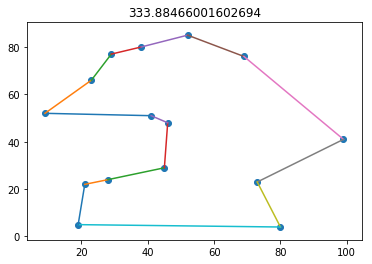

In [58]:
points = initialize_points(15)
mapdist = initialize_map(points)
order = held_karp(mapdist)
distance = total_distance(mapdist,order)
plot_points(mapdist,points,order,distance)

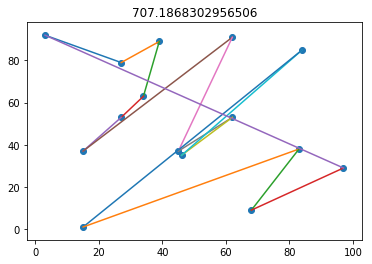

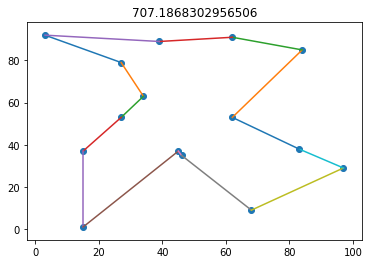

In [86]:
points = initialize_points(15)
mapdist = initialize_map(points)
order = nearest_neighbour(mapdist)
order2 = held_karp(mapdist)
distance = total_distance(mapdist,order)
distance2 = total_distance(mapdist,order)
plot_points(mapdist,points,order,distance)
plot_points(mapdist,points,order2,distance2)

In [79]:
timesBrute =[]
timesHeld = []
n=15
times = range(2,n)
for i in range(2,n):
    points = initialize_points(i)
    mapdist = initialize_map(points)
    a=time.time()
    brute_force(mapdist)
    timesBrute.append(math.log(time.time()-a))
    a=time.time()
    held_karp(mapdist)
    timesHeld.append(math.log(time.time()-a))

Brute [-10.77190115784059, -11.090354888959125, -10.351398172367885, -9.094379878302378, -7.487492987659884, -5.5635333648547824, -3.716215805649446, -1.7051503852903693, 0.5100905476029028, 2.951447932916822]
Held [-11.611651812592411, -10.931749858782487, -10.321984287161593, -9.474686426774388, -8.51227101431694, -7.610558148442684, -6.865804771082083, -5.924944110266769, -5.044905360804607, -4.103542965226818]


Text(0.5, 0, 'Number of cities')

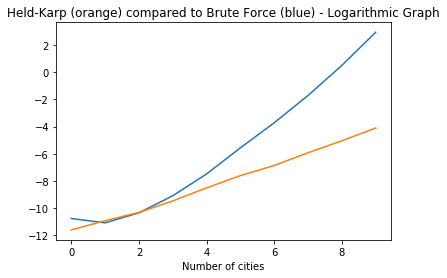

In [83]:
plt.plot(timesBrute)
plt.plot(timesHeld)
print('Brute',timesBrute)
print('Held',timesHeld)
plt.title('Held-Karp (orange) compared to Brute Force (blue) - Logarithmic Graph')
plt.xlabel('Number of cities')